This folder contains data behind the story [Comic Books Are Still Made By Men, For Men And About Men](http://fivethirtyeight.com/features/women-in-comic-books/).

The data comes from [Marvel Wikia](http://marvel.wikia.com/Main_Page) and [DC Wikia](http://dc.wikia.com/wiki/Main_Page). Characters were scraped on August 24. Appearance counts were scraped on September 2. The month and year of the first issue each character appeared in was pulled on October 6.

The data is split into two files, for DC and Marvel, respectively: `dc-wikia-data.csv` and `marvel-wikia-data.csv`. Each file has the following variables:

Variable | Definition
---|---------
`page_id` | The unique identifier for that characters page within the wikia
`name` | The name of the character
`urlslug` | The unique url within the wikia that takes you to the character
`ID` | The identity status of the character (Secret Identity, Public identity, [on marvel only: No Dual Identity])
`ALIGN` | If the character is Good, Bad or Neutral
`EYE` | Eye color of the character
`HAIR` | Hair color of the character
`SEX` | Sex of the character (e.g. Male, Female, etc.)
`GSM` | If the character is a gender or sexual minority (e.g. Homosexual characters, bisexual characters)
`ALIVE` | If the character is alive or deceased
`APPEARANCES` | The number of appareances of the character in comic books (as of Sep. 2, 2014. Number will become increasingly out of date as time goes on.)
`FIRST APPEARANCE` | The month and year of the character's first appearance in a comic book, if available
`YEAR` | The year of the character's first appearance in a comic book, if available


![characters](http://getwallpapers.com/wallpaper/full/f/6/7/133994.jpg)

## Setting env

> joypy, pywaffle은 conda-forge를 통해 받았고
>
> plotly는 그냥 conda로, bubbly는 pip을 통해 받음

In [2]:
# for some basic operations
import numpy as np 
import pandas as pd 
import random
import joypy
from collections import Counter

print("basic oper done!")

basic oper done!


In [3]:
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
from pandas import plotting
from pandas.plotting import parallel_coordinates

print("visual done!")

visual done!


In [4]:
# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
from bubbly.bubbly import bubbleplot

# for providing path
import os
print(os.listdir("input"))

['dc-wikia-data.csv', 'marvel-wikia-data.csv']


## Reading

### DC Data

> 6896명의 히어로가 있음
>
>

In [17]:
dc = pd.read_csv('input/dc-wikia-data.csv')

# sample 5개 출력
dc.sample(5)

page_id                          name  \
5589   250858          Squillic (New Earth)   
2487    42878       Mack Harlin (New Earth)   
5569   286022  Jinny Greenteeth (New Earth)   
752    142775          Predator (New Earth)   
2746   344593  George Yedziniak (New Earth)   

                                   urlslug               ID  \
5589          \/wiki\/Squillic_(New_Earth)  Secret Identity   
2487       \/wiki\/Mack_Harlin_(New_Earth)              NaN   
5569  \/wiki\/Jinny_Greenteeth_(New_Earth)              NaN   
752           \/wiki\/Predator_(New_Earth)              NaN   
2746  \/wiki\/George_Yedziniak_(New_Earth)  Public Identity   

                   ALIGN         EYE        HAIR                SEX  GSM  \
5589     Good Characters  Black Eyes         NaN    Male Characters  NaN   
2487  Neutral Characters         NaN         NaN    Male Characters  NaN   
5569     Good Characters         NaN  White Hair  Female Characters  NaN   
752                  NaN         NaN         NaN                NaN  NaN   
2746                 NaN         NaN         NaN    Male Characters  NaN   

                    ALIVE  APPEARANCES FIRST APPEARANCE    YEAR  
5589  Deceased Characters          1.0  2011, September  2011.0  
2487    Living Characters          9.0    1995, January  1995.0  
5569  Deceased Characters          1.0     2011, August  2011.0  
752   Deceased Characters         38.0       1984, July  1984.0  
2746    Living Characters          8.0       1989, July  1989.0

In [20]:
# 조금 더 자세히 분석
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           6896 non-null   int64  
 1   name              6896 non-null   object 
 2   urlslug           6896 non-null   object 
 3   ID                4883 non-null   object 
 4   ALIGN             6295 non-null   object 
 5   EYE               3268 non-null   object 
 6   HAIR              4622 non-null   object 
 7   SEX               6771 non-null   object 
 8   GSM               64 non-null     object 
 9   ALIVE             6893 non-null   object 
 10  APPEARANCES       6541 non-null   float64
 11  FIRST APPEARANCE  6827 non-null   object 
 12  YEAR              6827 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 700.5+ KB


In [36]:
max(dc['YEAR'])

1935

In [21]:
# 결측값이 존재하는 것 같으니 확인해본다
dc.isnull().sum()

page_id                0
name                   0
urlslug                0
ID                  2013
ALIGN                601
EYE                 3628
HAIR                2274
SEX                  125
GSM                 6832
ALIVE                  3
APPEARANCES          355
FIRST APPEARANCE      69
YEAR                  69
dtype: int64

### Marvel Data

> 16376명의 히어로가 있음
>
>

In [16]:
marvel = pd.read_csv('input/marvel-wikia-data.csv')

# head 출력
marvel.head()

page_id                                 name  \
0     1678            Spider-Man (Peter Parker)   
1     7139      Captain America (Steven Rogers)   
2    64786  Wolverine (James \"Logan\" Howlett)   
3     1868    Iron Man (Anthony \"Tony\" Stark)   
4     2460                  Thor (Thor Odinson)   

                                   urlslug                ID  \
0              \/Spider-Man_(Peter_Parker)   Secret Identity   
1        \/Captain_America_(Steven_Rogers)   Public Identity   
2  \/Wolverine_(James_%22Logan%22_Howlett)   Public Identity   
3    \/Iron_Man_(Anthony_%22Tony%22_Stark)   Public Identity   
4                    \/Thor_(Thor_Odinson)  No Dual Identity   

                ALIGN         EYE        HAIR              SEX  GSM  \
0     Good Characters  Hazel Eyes  Brown Hair  Male Characters  NaN   
1     Good Characters   Blue Eyes  White Hair  Male Characters  NaN   
2  Neutral Characters   Blue Eyes  Black Hair  Male Characters  NaN   
3     Good Characters   Blue Eyes  Black Hair  Male Characters  NaN   
4     Good Characters   Blue Eyes  Blond Hair  Male Characters  NaN   

               ALIVE  APPEARANCES FIRST APPEARANCE    Year  
0  Living Characters       4043.0           Aug-62  1962.0  
1  Living Characters       3360.0           Mar-41  1941.0  
2  Living Characters       3061.0           Oct-74  1974.0  
3  Living Characters       2961.0           Mar-63  1963.0  
4  Living Characters       2258.0           Nov-50  1950.0

In [22]:
# 속성은 같으니까 데이터 크기만 확인
marvel.shape

(16376, 13)

In [30]:
# 결측값이 있는지 확인
marvel.isnull().sum()

page_id                 0
name                    0
urlslug                 0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES             0
FIRST APPEARANCE      815
Year                  815
dtype: int64

## Data Visualization

> 깔끔한 그래프를 위해 각 속성의 결측값은 최빈값으로 대체

In [34]:
# imputing missing values
# 'id', 'align' 은 int64 타입
# 나머지 7개 속성은 object 타입

dc['ID'] = dc['ID'].fillna(dc['ID'].mode()[0])
dc['ALIGN'] = dc['ALIGN'].fillna(dc['ALIGN'].mode()[0])
dc['EYE'].fillna(dc['EYE'].mode()[0], inplace = True)
dc['HAIR'].fillna(dc['HAIR'].mode()[0], inplace = True)
dc['SEX'].fillna(dc['SEX'].mode()[0], inplace = True)
dc['ALIVE'].fillna(dc['ALIVE'].mode()[0], inplace = True)
dc['APPEARANCES'].fillna(dc['APPEARANCES'].mode()[0], inplace = True)
dc['FIRST APPEARANCE'].fillna(dc['FIRST APPEARANCE'].mode()[0], inplace = True)
dc['YEAR'].fillna(dc['YEAR'].mode()[0], inplace = True)

marvel['ID'] = marvel['ID'].fillna(marvel['ID'].mode()[0])
marvel['ALIGN'] = marvel['ALIGN'].fillna(marvel['ALIGN'].mode()[0])
marvel['EYE'].fillna(marvel['EYE'].mode()[0], inplace = True)
marvel['HAIR'].fillna(marvel['HAIR'].mode()[0], inplace = True)
marvel['SEX'].fillna(marvel['SEX'].mode()[0], inplace = True)
marvel['ALIVE'].fillna(marvel['ALIVE'].mode()[0], inplace = True)
marvel['APPEARANCES'].fillna(marvel['APPEARANCES'].mode()[0], inplace = True)
marvel['FIRST APPEARANCE'].fillna(marvel['FIRST APPEARANCE'].mode()[0], inplace = True)
marvel['Year'].fillna(marvel['Year'].mode()[0], inplace = True)

print('imputing complete!')

imputing complete!


### Bubbleplot

> Year: 코믹스 내에서 캐릭터가 처음 등장한 년도
>
> Appearance: 코믹스에 등장한 횟수
>
> Align: 동맹 관계

- Good 캐릭터들이 Bad 캐릭터에 비해 자주 등장한다는 것을 알 수 있다

In [40]:
# 주피터 노트북 화면 출력 설정
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

dc['YEAR'] = dc['YEAR'].astype(int)
dc['APPEARANCES'] = dc['APPEARANCES'].astype(int)

figure = bubbleplot(dataset = dc, y_column = 'APPEARANCES', x_column = 'YEAR', 
    bubble_column = 'ALIGN', size_column = 'APPEARANCES', color_column = 'ALIGN',
    y_title = "Appearances", x_title = "Year", title = 'Year VS ALIGNMENT VS APPEARANCES',
    show_slider = True, scale_bubble = 3, height = 650)

py.iplot(figure, config={'scrollzoom': False})

### Violinplot

> Secret Identity: 정체를 숨기고 활동하는 캐릭터 (스파이더맨, 베트맨 등)
>
> Public Identity: 정체를 공개하고 활동하는 캐릭터 (캡틴 아메리카, 울버린 등)
>
> Identity Unknown: 정체를 모르는 캐릭터 ('new earth'의 조커, 스노우플레임 등)
>
> No Dual Identity: 동맹 관계가 없는 캐릭터 (타노스, 브루스 배너 등)
>
> Known to Authorities Identity: 일부 당국(정부, 쉴드 등)에만 정체가 알려진 캐릭터 ('데드풀' 웨이드 윌슨 등)

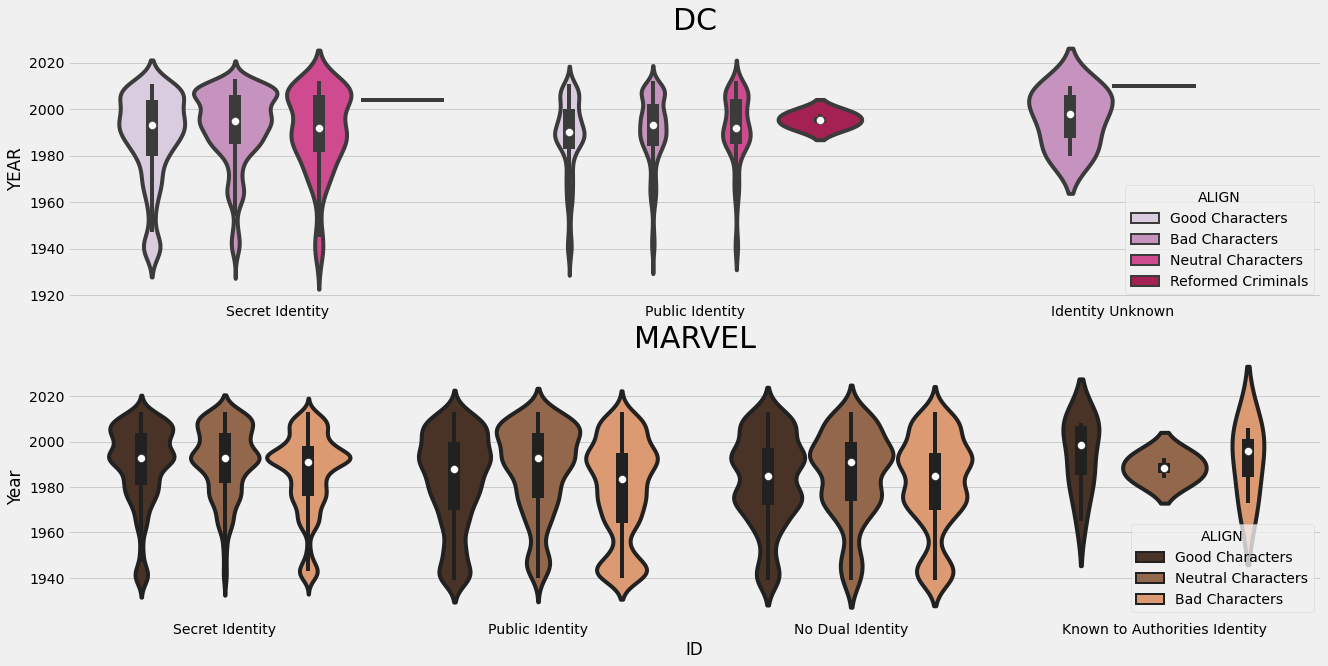

In [36]:
%matplotlib inline

# matplotlib 테마 변경
plt.style.use('fivethirtyeight')
# 차트의 크기 설정
plt.rcParams['figure.figsize'] = (20, 10)

# DC 캐릭터
plt.subplot(2, 1, 1)  # (2행, 1열의 1행)
sns.violinplot(dc['ID'], dc['YEAR'], hue = dc['ALIGN'], palette = 'PuRd')
plt.xlabel(' ')
plt.title('DC', fontsize = 30)

# Marvel 캐릭터
plt.subplot(2, 1, 2) # (2행, 1열의 2행)
sns.violinplot(marvel['ID'], marvel['Year'], hue = marvel['ALIGN'], palette = 'copper')
plt.title('MARVEL', fontsize = 30)

plt.show()

### KDEplot

> Kernel Density Estimation(커널밀도추정) 그래프


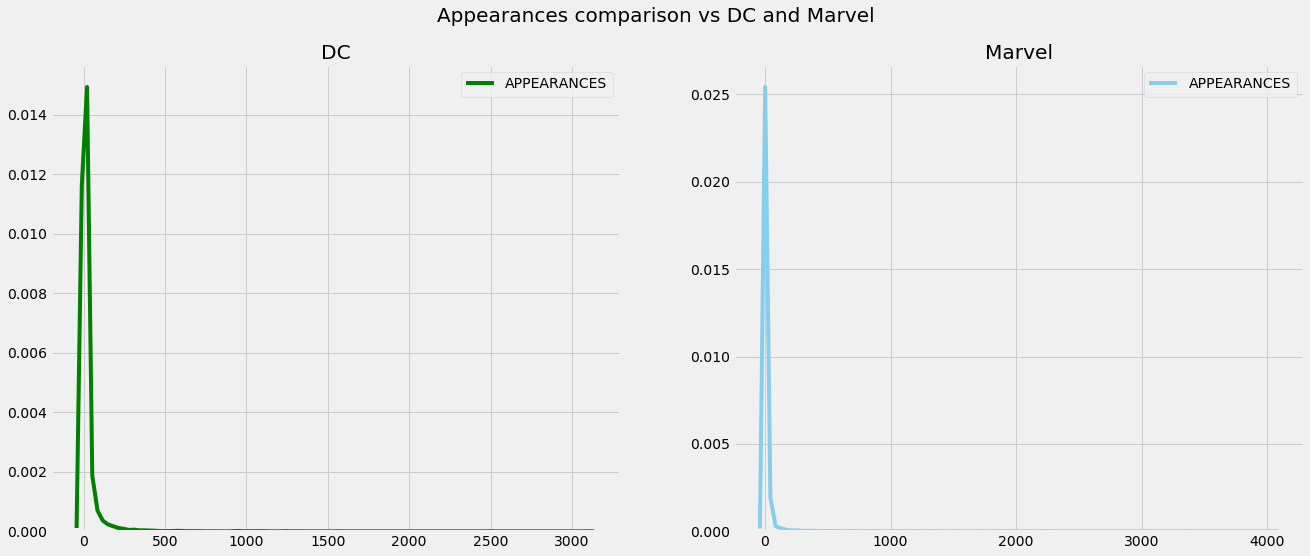

In [21]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 8)

dc['APPEARANCES'].fillna(0, inplace = True)
marvel['APPEARANCES'].fillna(0, inplace = True)

plt.subplot(1, 2, 1)
sns.kdeplot(dc['APPEARANCES'], color = 'green')
plt.title('DC')

plt.subplot(1, 2, 2)
sns.kdeplot(marvel['APPEARANCES'], color = 'skyblue')
plt.title('Marvel')

plt.suptitle('Appearances comparison vs DC and Marvel', fontsize = 20)
plt.show()

### Histogram

In [41]:
trace1 = go.Histogram(
         x = dc['ID'],
         name = 'DC',
         opacity = 0.75,
         marker = dict(
               color = 'rgb(52, 85, 159, 0.6)'
         )
)
trace2 = go.Histogram(
          x = marvel['ID'],
          name = 'Marvel',
          opacity = 0.75,
          marker = dict(
                 color = 'rgb(84, 52, 15, 0.6)'
          )
)
data = [trace1, trace2]

layout = go.Layout(
    barmode = 'group',
    title = 'Comparison of Identities')

fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

### Boxplot

In [42]:
trace = go.Box(
            x = dc['ALIGN'],
            y = dc['APPEARANCES'],
            name = 'DC',
            marker = dict(
                  color = 'rgb(145, 65, 75)')
)
                   

trace2 = go.Box(
            x = marvel['ALIGN'],
            y = marvel['APPEARANCES'],
            name = 'Marvel',
            marker = dict(
                   color = 'rgb(2, 15, 85)'),

              )

data = [trace, trace2]

layout = go.Layout(
    boxmode = 'group',
    title = 'Character vs Appearances')

fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

### Pie plot

In [43]:
gsm_dc = dc['GSM'].value_counts()
gsm_marvel = marvel['GSM'].value_counts()

label_dc = gsm_dc.index
size_dc = gsm_dc.values

label_marvel = gsm_marvel.index
size_marvel = gsm_marvel.values

colors = ['aqua', 'gold']

trace = go.Pie(
         labels = label_dc, values = size_dc, marker = dict(colors = colors), name = 'DC', hole = 0.3)
colors2 = ['pink', 'lightblue']

trace2 = go.Pie(labels = label_marvel, values = size_marvel, marker = dict(colors = colors2), name = 'Marvel', hole = 0.3)

data = [trace]
data2 = [trace2]

layout1 = go.Layout(
           title = 'Sexual Minority Groups in DC')
layout2 = go.Layout(
           title = 'Sexual Minority Groups in Marvel'  )

fig = go.Figure(data = data, layout = layout1)
fig2 = go.Figure(data = data2, layout = layout2)
py.iplot(fig)
py.iplot(fig2)

### Waffle plot

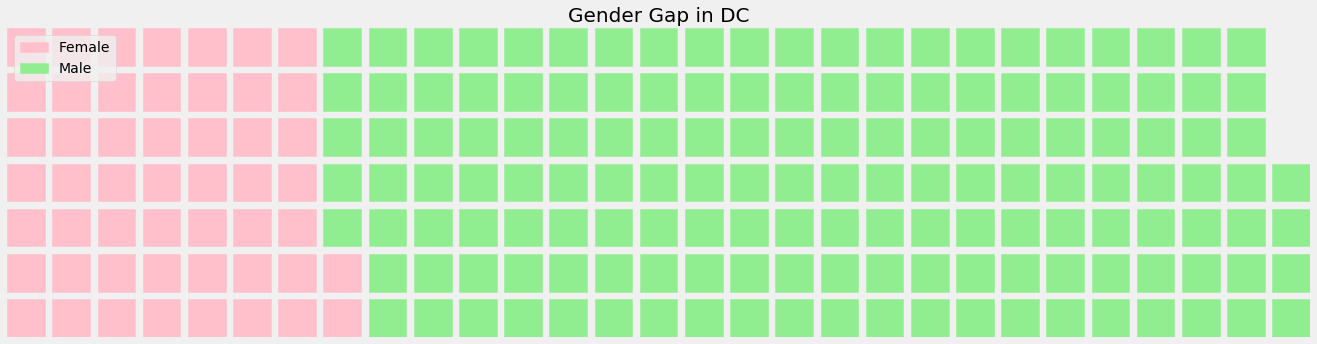

In [44]:
# Prepare Data
df = dc.iloc[:200,:].groupby('SEX').size().reset_index(name='counts')
n_categories = df.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    values = df['counts'],
    labels = ['Female','Male'],
    legend = {'loc': 'upper left'},
    title = {'label': 'Gender Gap in DC', 'fontsize': 20},    
    rows=7,
    colors=['pink','lightgreen'],
    figsize = (20, 5)
)

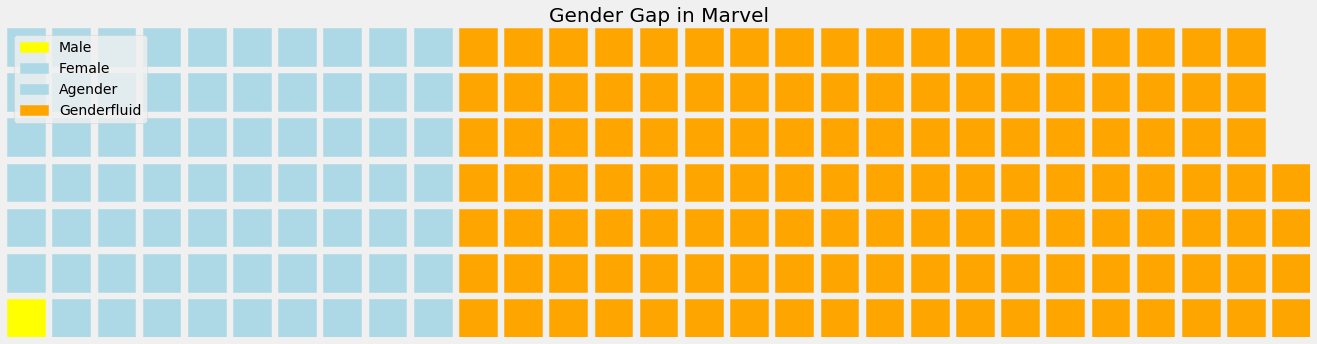

In [45]:
# Prepare Data
df = marvel.iloc[:200,:].groupby('SEX').size().reset_index(name='counts')
n_categories = df.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    values = df['counts'],
    labels = ['Male','Female','Agender', 'Genderfluid'],
    legend = {'loc': 'upper left'},
    title = {'label': 'Gender Gap in Marvel', 'fontsize': 20},    
    rows=7,
    colors=['yellow','lightblue', 'lightblue','orange'],
    figsize = (20, 5)
)

![](https://i.pinimg.com/originals/29/df/17/29df176d0b0c352444204446a5b1c3f6.gif)

In [47]:
# Inspired from https://www.kaggle.com/piyush1912/dc-vs-marvel-comics 

marvel['comics'] = 'Marvel'
marvel = marvel.truncate(before=-1, after=15)
import networkx as nx
marvel = nx.from_pandas_edgelist(marvel, source='comics', target='name', edge_attr=True,)

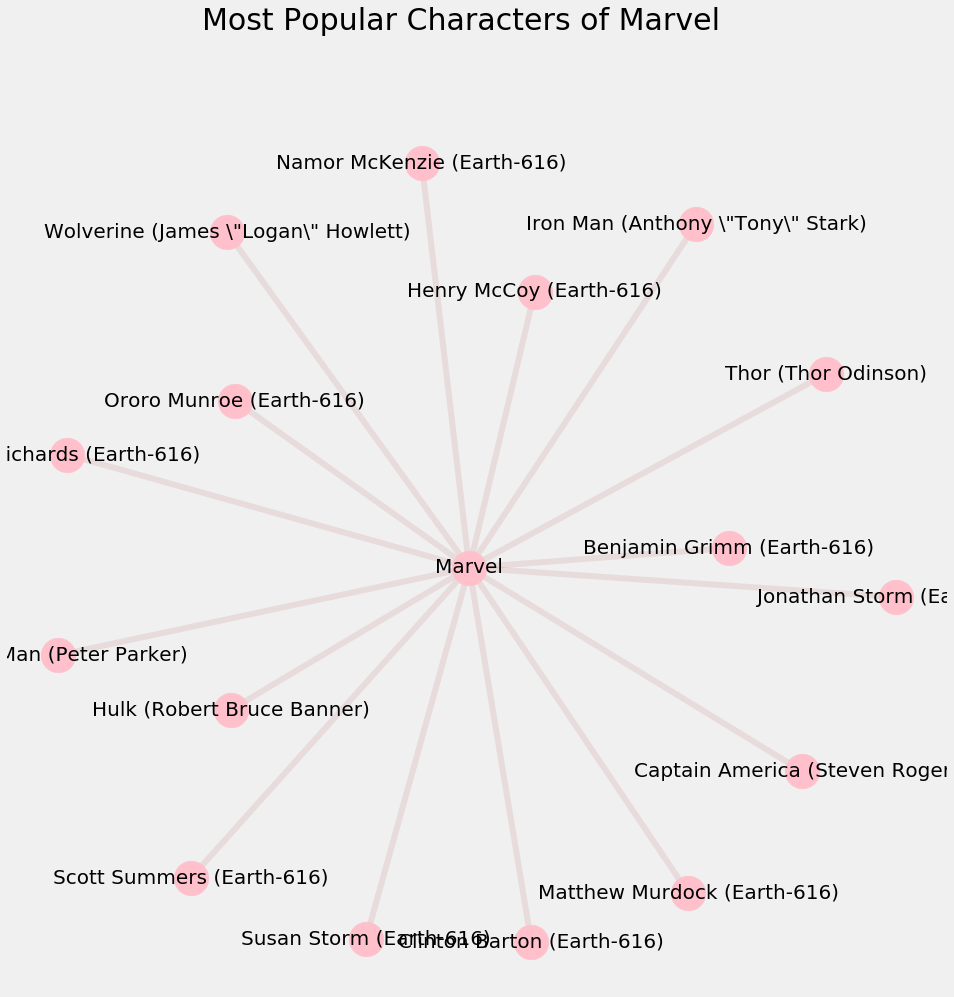

In [48]:
plt.rcParams['figure.figsize']  = (15, 15)
plt.style.use('fivethirtyeight')
plt.suptitle('Most Popular Characters of Marvel', fontsize = 30)

pos = nx.spring_layout(marvel)

# drawing nodes
nx.draw_networkx_nodes(marvel, pos, node_size = 1200, node_color = 'pink')

# drawing edges
nx.draw_networkx_edges(marvel, pos, width = 6, alpha = 0.1, edge_color = 'brown')

# labels
nx.draw_networkx_labels(marvel, pos, font_size = 20, font_family = 'sans-serif')

plt.grid()
plt.axis('off')
plt.show()

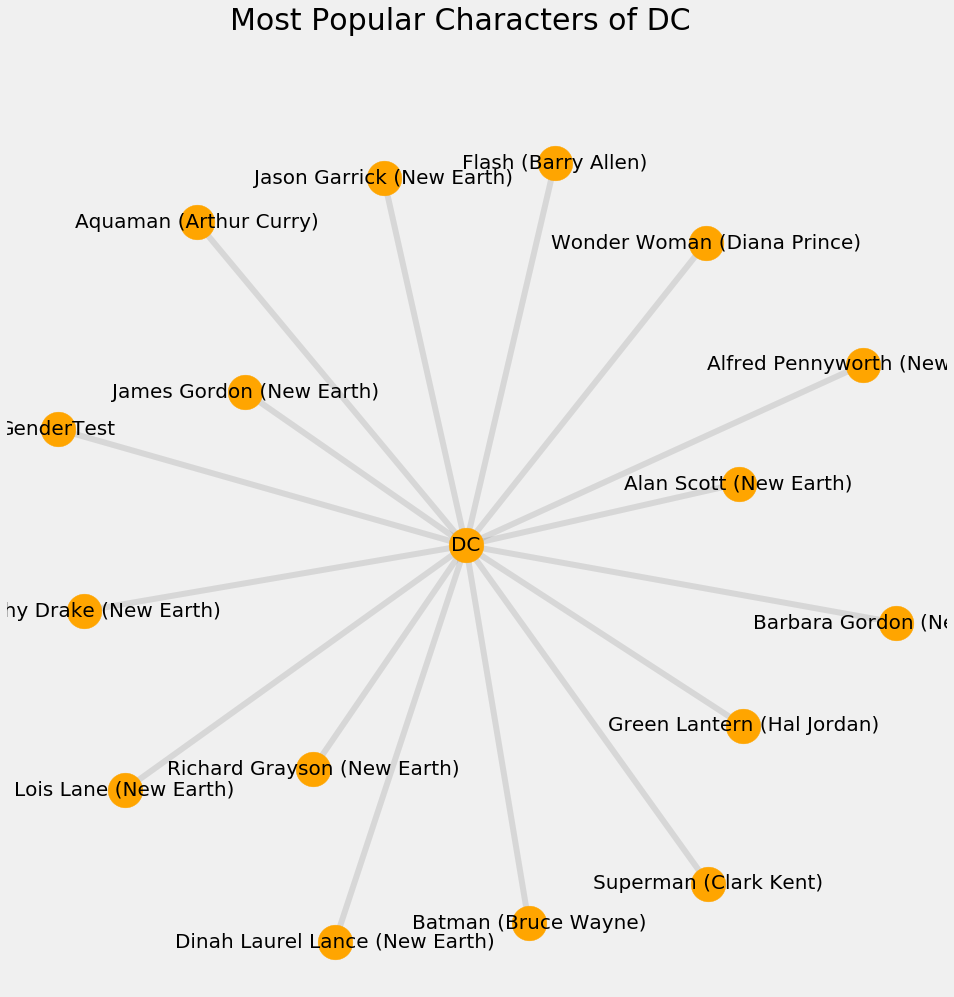

In [49]:
dc['comics']= 'DC'
dc= dc.truncate(before=-1, after=15)

dc = nx.from_pandas_edgelist(dc, source='comics', target='name', edge_attr=True,)

plt.rcParams['figure.figsize']  = (15, 15)
plt.style.use('fivethirtyeight')
plt.suptitle('Most Popular Characters of DC', fontsize = 30)

pos = nx.spring_layout(dc)

# drawing nodes
nx.draw_networkx_nodes(dc, pos, node_size = 1200, node_color = 'orange')

# drawing edges
nx.draw_networkx_edges(dc, pos, width = 6, alpha = 0.1, edge_color = 'black')

# labels
nx.draw_networkx_labels(dc, pos, font_size = 20, font_family = 'sans-serif')

plt.grid()
plt.axis('off')
plt.show()